In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MetropolisSampler:
    """A class to perform Metropolis-Hastings sampling."""
    
    def __init__(self, target_function, sigma=1.0, seed=None):
        """
        Initialize the Metropolis-Hastings sampler.
        
        Args:
            target_function (callable): The target distribution function
            sigma (float): Step size for the proposal distribution
            seed (int, optional): Random seed for reproducibility
        """
        self.target_function = target_function
        self.sigma = sigma
        if seed is not None:
            np.random.seed(seed)
        
        self.samples = None
        self.accepted = None
        self.rejected = None
    
    def _metropolis_step(self, current_x):
        """Perform a single Metropolis-Hastings step."""
        proposed_x = np.random.normal(current_x, self.sigma)
        alpha = min(1, self.target_function(proposed_x) / self.target_function(current_x))
        u = np.random.uniform()
        
        if u < alpha:
            return proposed_x, True
        return current_x, False
    
    def sample(self, initial_value, n_samples=1000):
        """
        Generate samples using the Metropolis-Hastings algorithm.
        
        Args:
            initial_value (float): Starting point for the chain
            n_samples (int): Number of samples to generate
        
        Returns:
            pandas.DataFrame: DataFrame containing samples and acceptance status
        """
        results = []
        current_state = initial_value
        
        for _ in range(n_samples):
            new_state, accepted = self._metropolis_step(current_state)
            results.append((new_state, accepted))
            current_state = new_state
        
        self.samples = pd.DataFrame(results, columns=['value', 'accepted'])
        self.accepted = self.samples[self.samples['accepted']]
        self.rejected = self.samples[~self.samples['accepted']]
        
        return self.samples
    
    def plot_results(self, x_range=(-11, 11), n_points=10000, bins=50):
        """
        Plot the sampling results against the target distribution.
        
        Args:
            x_range (tuple): Range of x values for plotting
            n_points (int): Number of points for target function curve
            bins (int): Number of histogram bins
        """
        if self.samples is None:
            raise ValueError("No samples available. Run sample() first.")
            
        fig, ax1 = plt.subplots()
        
        # Plot histogram of accepted samples
        ax1.hist(self.accepted['value'], bins=bins)
        ax1.set_ylabel('Frequency')
        ax1.set_xlabel('x-Value')
        ax1.set_title('Resulting Accepted Distribution vs Target Function')
        
        # Plot target distribution
        ax2 = ax1.twinx()
        x_vals = np.linspace(x_range[0], x_range[1], n_points)
        y_vals = [self.target_function(x) for x in x_vals]
        ax2.plot(x_vals, y_vals, 'r-', label='Target Function')
        ax2.set_ylabel('Target Function Value')
        ax2.set_ylim(0, 1)
        
        plt.show()
        
    def plot_rejected(self, bins=50):
        """Plot histogram of rejected samples."""
        if self.samples is None:
            raise ValueError("No samples available. Run sample() first.")
            
        plt.figure()
        plt.hist(self.rejected['value'], bins=bins)
        plt.ylabel('Frequency')
        plt.xlabel('Value')
        plt.title('Resulting Rejected Distribution')
        plt.show()

# Example target functions
def nongauss_f(x):
    """Non-gaussian target distribution."""
    return np.exp(-x**2 * (2 + np.sin(5*x) + np.sin(2*x)))

def gauss_f(x):
    """Gaussian target distribution."""
    return np.exp(-x**2)

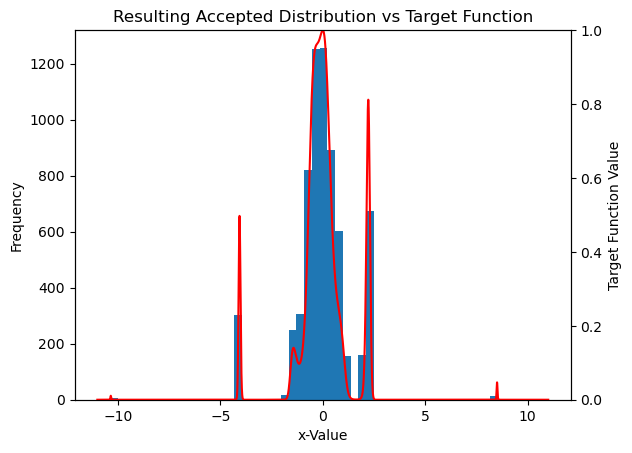

In [4]:
# Example usage
sampler = MetropolisSampler(target_function=nongauss_f, sigma=12, seed=1234)
samples = sampler.sample(initial_value=0.1, n_samples=100000)
sampler.plot_results()